In [1]:
import requests
import json
from PIL import Image as Img
from io import BytesIO
import boto3
from boto.s3.key import Key
import numpy as np
url = 'http://ec2-54-174-208-122.compute-1.amazonaws.com:5000/api/allImages'
resp = requests.get(url=url)
data = json.loads(resp.text)

In [2]:
data = json.loads(resp.text)

In [3]:
data

[{'HasHatefullText': 0,
  'HasOtherHateSymbol': 0,
  'HasSwastika': 1,
  'HasText': 0,
  'HateImage': '0',
  'IsHatefull': 1,
  'Num': 1,
  'key': '1.bp.blogspot.com--9HN-7kwmZe0-VzoHSC-VQJI-AAAAAAAAAdQ-XlXZXZokxx4MtdXWS2xdefqa0JPrM99-gCLcB-s1600-13218921-NAZI-and-USSR-flags-Stock-Photo-nazi-swastika-flag.jpg',
  'url': 'https://info-arch-hate-images-corp.s3.amazonaws.com/1.bp.blogspot.com--9HN-7kwmZe0-VzoHSC-VQJI-AAAAAAAAAdQ-XlXZXZokxx4MtdXWS2xdefqa0JPrM99-gCLcB-s1600-13218921-NAZI-and-USSR-flags-Stock-Photo-nazi-swastika-flag.jpg'},
 {'HasHatefullText': 0,
  'HasOtherHateSymbol': 0,
  'HasSwastika': 1,
  'HasText': 0,
  'HateImage': '0',
  'IsHatefull': 0,
  'Num': 2,
  'key': '1.bp.blogspot.com--CbVRbiVD-hk-V5a89jzhIUI-AAAAAAAADIk-SGRNBlHepAI8pCwEKpWJW7REV0hIUDBRwCLcB-s1600-Ancient-Mirahvara-Coin-with-Swastika.jpeg',
  'url': 'https://info-arch-hate-images-corp.s3.amazonaws.com/1.bp.blogspot.com--CbVRbiVD-hk-V5a89jzhIUI-AAAAAAAADIk-SGRNBlHepAI8pCwEKpWJW7REV0hIUDBRwCLcB-s1600-Ancient

In [4]:
import dhash

In [5]:
ddashScores = {}
imageList = []
labels = []
unhandledCount = 0
dupCount = 0
for i in range(0,1100):
    s3Link = data[i]['url']
    try:
        response = requests.get(s3Link)
        image = Img.open(BytesIO(response.content))
        row, col = dhash.dhash_row_col(image)
        if row in ddashScores:
            if ddashScores[row] == col:
                print('duplicate')
                dupCount = dupCount + 1
                raise
        ddashScores[row] = col
    except:
        print("error")
        unhandledCount = unhandledCount +1
        continue
    imageList.append(np.asarray(image.convert('RGB').resize((64,64))))
    labels.append(data[i]['HasSwastika'])
    print(str(i/1100 * 100))
    #s3 = boto3.client('s3')
    #s3.put_object(Bucket='info-arch-hate-images-train-stage',Key=key,Body=response.content)
    

0.0
0.125
0.25
0.375
0.5
0.625
0.75
0.8750000000000001
1.0
1.125
1.25
1.375
1.5
1.625
1.7500000000000002
1.875
2.0
2.125
2.25
2.375
2.5
2.625
2.75
2.875
3.0
3.125
3.25
3.375
3.5000000000000004
3.6249999999999996
3.75
3.875
4.0
4.125
4.25
4.375
4.5
4.625
4.75
4.875
5.0
5.125
5.25
5.375
5.5
5.625
5.75
5.875
6.0
6.125
6.25
6.375
6.5
6.625
6.75
6.875000000000001
7.000000000000001
7.124999999999999
7.249999999999999
7.375
7.5
7.625
7.75
7.875
8.0
8.125
8.25
8.375
8.5
8.625
8.75
8.875
9.0
9.125
9.25
9.375
9.5
9.625
9.75
9.875
10.0
10.125
10.25
10.375
10.5
10.625
10.75
10.875
11.0
11.125
11.25
11.375
11.5
11.625
11.75
11.875
12.0
12.125
12.25
12.375
12.5
12.625
12.75
12.875
13.0
13.125
13.25
13.375
13.5
13.625000000000002
13.750000000000002
13.875000000000002
14.000000000000002
14.124999999999998
14.249999999999998
14.374999999999998
14.499999999999998
14.625
14.75
14.875
15.0
15.125
15.25
15.375
15.5
15.625
15.75
15.875
16.0
16.125
16.25
16.375
16.5
16.625
16.75
16.875
17.0
17.125
17.25
17.3

/Users/harisx91/anaconda3/lib/python3.6/site-packages/PIL/Image.py:918: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


duplicate
error
36.875
37.0
37.125
37.25
37.375
37.5
37.625
37.75
37.875
38.0
38.125
38.25
38.375
38.5
38.625
38.75
38.875
39.0
39.125
39.25
39.375
duplicate
error
39.625
39.75
39.875
40.0
40.125
40.25
40.375
40.5
40.625
40.75
40.875
duplicate
error
41.125
41.25
41.375
41.5
41.625
41.75
41.875
42.0
42.125
duplicate
error
42.375
duplicate
error
42.625
42.75
42.875
43.0
43.125
43.25
duplicate
error
43.5
43.625
43.75
43.875
44.0
44.125
44.25
44.375
44.5
44.625
44.75
44.875
45.0
45.125
45.25
45.375
45.5
45.625
45.75
45.875
46.0
46.125
46.25
46.375
46.5
46.625
46.75
duplicate
error
47.0
47.125
47.25
47.375
47.5
47.625
47.75
47.875
48.0
48.125
48.25
48.375
48.5
48.625
48.75
48.875
49.0
49.125
49.25
49.375
49.5
49.625
49.75
49.875
50.0
50.125
50.24999999999999
50.375
50.5
50.625
50.74999999999999
50.875
51.0
51.125
51.24999999999999
51.37500000000001
51.5
51.625
51.74999999999999
51.87500000000001
52.0
52.125
52.25
52.37500000000001
52.5
52.625
52.75
52.87500000000001
53.0
53.125
53.25
53.374

In [6]:

unhandledCount, dupCount

(72, 71)

In [7]:
imageList[0].shape

(64, 64, 3)

In [8]:
imageArray = np.array(imageList)

In [9]:
imageArray.shape

(1028, 64, 64, 3)

In [145]:
from sklearn.model_selection import train_test_split

(X_train, X_test, Y_train, Y_test) = train_test_split(imageArray, labels, test_size=0.40, random_state = 40)

In [146]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten,Dense, Dropout
from tensorflow.keras.models import Sequential
import tensorflow as tf
seed = 55
tf.random.set_random_seed(seed)

## Add explanations 

In [152]:

input_shape = (64,64,3)
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape=input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(128, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(256, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid'))

In [153]:
model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.Adam(lr= 5e-4),
              metrics = ['acc'])

In [155]:

history = model.fit(X_train, Y_train, epochs = 15)
#tf.random.set(seed)

Epoch 1/15
616/616 [==============================] - 3s 6ms/step - loss: 0.6899 - acc: 0.5406
Epoch 2/15
616/616 [==============================] - 3s 6ms/step - loss: 0.6800 - acc: 0.5471
Epoch 3/15
616/616 [==============================] - 3s 6ms/step - loss: 0.6787 - acc: 0.5438
Epoch 4/15
616/616 [==============================] - 3s 6ms/step - loss: 0.6739 - acc: 0.5438
Epoch 5/15
616/616 [==============================] - 3s 5ms/step - loss: 0.6601 - acc: 0.5438
Epoch 6/15
616/616 [==============================] - 3s 6ms/step - loss: 0.6565 - acc: 0.5617
Epoch 7/15
616/616 [==============================] - 4s 6ms/step - loss: 0.6562 - acc: 0.5568
Epoch 8/15
616/616 [==============================] - 3s 6ms/step - loss: 0.6499 - acc: 0.6120
Epoch 9/15
616/616 [==============================] - 3s 6ms/step - loss: 0.6541 - acc: 0.5649
Epoch 10/15
616/616 [==============================] - 4s 6ms/step - loss: 0.6396 - acc: 0.5812
Epoch 11/15
616/616 [============================

In [156]:
import sklearn.metrics as metrics

results_test = model.evaluate(X_test, Y_test)
y_preds = model.predict_classes(X_test)
print(metrics.classification_report(Y_test, y_preds))

412/412 [==============================] - 2s 4ms/step
              precision    recall  f1-score   support

           0       0.54      0.72      0.62       178
           1       0.71      0.53      0.61       234

    accuracy                           0.61       412
   macro avg       0.63      0.63      0.61       412
weighted avg       0.64      0.61      0.61       412



In [157]:
import sklearn.metrics as metrics

results_test = model.evaluate(X_train, Y_train)
y_preds_train = model.predict_classes(X_train)
print(metrics.classification_report(Y_train, y_preds_train))

616/616 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       281
           1       0.90      0.78      0.83       335

    accuracy                           0.83       616
   macro avg       0.84      0.84      0.83       616
weighted avg       0.84      0.83      0.83       616



In [158]:
fpr,tpr,threshold = metrics.roc_curve(Y_test, y_preds, drop_intermediate = False)

In [159]:
import matplotlib.pyplot as plt

In [160]:
%matplotlib inline

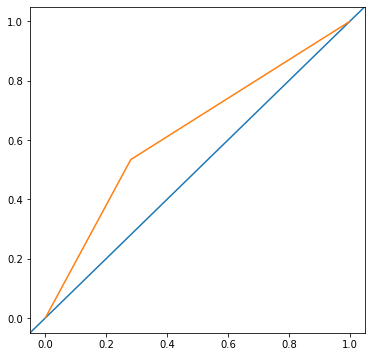

In [161]:
#X_axis
#Y_axis
f, ax = plt.subplots(figsize=(6, 6))
ax.plot([0, 1], [0, 1], transform=ax.transAxes)
ax.plot(fpr, tpr)

In [162]:
metrics.roc_auc_score(Y_test, y_preds)

0.6266445788917698

In [163]:
name = 'primitive_model4.h5'
model.save(name)

In [64]:
#s3 = boto3.client('s3')
#s3.put_object(Bucket='info-arch-hate-images-train-stage',Key=name,Body=open(name, 'rb'))